In [38]:
# INF2178
# Assignment 2
# Lan Li
# Student Number: 1005814326

# Set working directory
%cd /content/sample_data

/content/sample_data


In [39]:
# Import the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat

# Read the Excel file as data frame
df = pd.read_excel('INF2178_A2_data.xlsx', index_col=0)

# Display the first few rows of the dataframe
df.head()

,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
_id,,,,,,,,,,,,,,,,
1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [40]:
# Look the columns, NA counts and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 1 to 1063
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LOC_ID       1063 non-null   int64 
 1   LOC_NAME     1063 non-null   object
 2   AUSPICE      1063 non-null   object
 3   ADDRESS      1063 non-null   object
 4   PCODE        1063 non-null   object
 5   ward         1063 non-null   int64 
 6   bldg_type    1063 non-null   object
 7   BLDGNAME     715 non-null    object
 8   IGSPACE      1063 non-null   int64 
 9   TGSPACE      1063 non-null   int64 
 10  PGSPACE      1063 non-null   int64 
 11  KGSPACE      1063 non-null   int64 
 12  SGSPACE      1063 non-null   int64 
 13  TOTSPACE     1063 non-null   int64 
 14  subsidy      1063 non-null   object
 15  cwelcc_flag  1063 non-null   object
dtypes: int64(8), object(8)
memory usage: 141.2+ KB


In [41]:
# Learn the quantitative variables
df.describe()

,LOC_ID,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,8087.888053,12.511759,3.896519,11.600188,24.258702,14.257761,21.661336,75.674506
std,5151.252693,7.032050,6.091782,12.088152,18.577416,20.493290,30.423503,47.816518
min,1013.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1862.000000,6.000000,0.000000,0.000000,16.000000,0.000000,0.000000,43.000000
50%,8826.000000,12.000000,0.000000,10.000000,24.000000,0.000000,0.000000,62.000000
75%,13245.000000,19.000000,10.000000,15.000000,32.000000,26.000000,30.000000,97.000000
max,14504.000000,25.000000,30.000000,90.000000,144.000000,130.000000,285.000000,402.000000


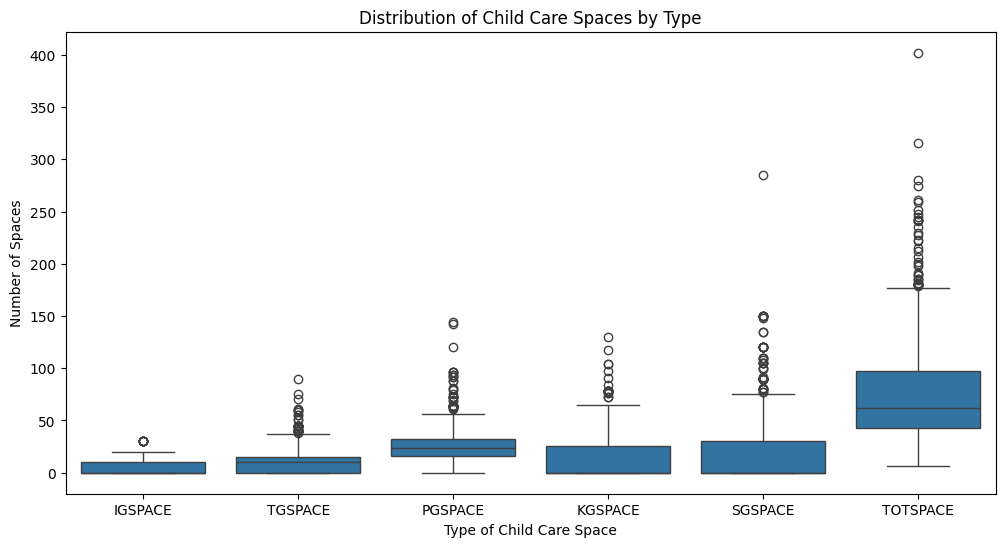

In [42]:
# First, reshape the data so that it's in long format
melted_df = df.melt(value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE'],
                    var_name='Space Type', value_name='Count')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='Space Type', y='Count')

# Add labels and a title
plt.xlabel('Type of Child Care Space')
plt.ylabel('Number of Spaces')
plt.title('Distribution of Child Care Spaces by Type')

plt.show()

# One-Way ANOVA

In [43]:
# Learn the total capacity by each agency
df.groupby('AUSPICE')['TOTSPACE'].describe()

,count,mean,std,min,25%,50%,75%,max
AUSPICE,,,,,,,,
Commercial Agency,321.0,64.984424,36.588203,6.0,37.0,58.0,85.0,235.0
Non Profit Agency,703.0,82.103841,51.908881,13.0,47.0,66.0,109.0,402.0
Public (City Operated) Agency,39.0,47.769231,17.859778,16.0,36.0,49.0,62.0,96.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


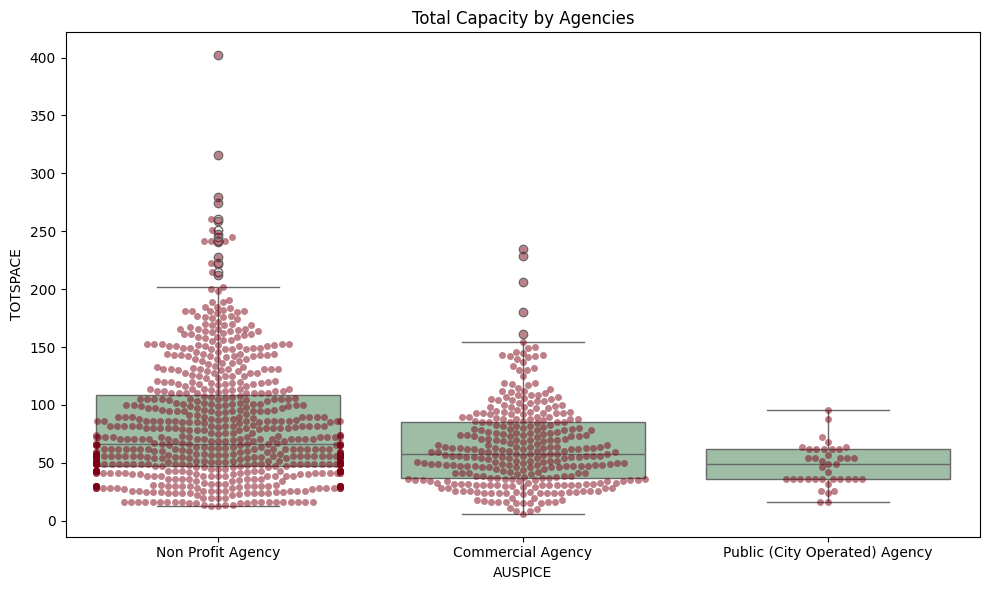

In [44]:
# Increase the size of the plot
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df, color='#99c2a2')

# Create a swarmplot on top of the boxplot with adjusted size and transparency
ax = sns.swarmplot(x='AUSPICE', y='TOTSPACE', data=df, color='#7d0013', size=5, alpha=0.5)

# Improve layout and display the plot
plt.title('Total Capacity by Agencies')
plt.tight_layout()
plt.show()

In [45]:
# ANOVA table
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,9.611211e+04,48056.057145,21.843051,5.057716e-10
Residual,1060.0,2.332065e+06,2200.061571,NaN,NaN


In [46]:
# Post hoc test using Tukey's HSD
res = stat()
res.tukey_hsd(df=df, res_var='TOTSPACE', xfac_var='AUSPICE', anova_model='TOTSPACE ~ C(AUSPICE)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,16.806538,3.993722,29.619353,4.356853,0.006071
1,Non Profit Agency,Public (City Operated) Agency,36.177966,8.673910,63.682022,4.369046,0.005901
2,Commercial Agency,Public (City Operated) Agency,19.371429,-10.141900,48.884757,2.180132,0.272554


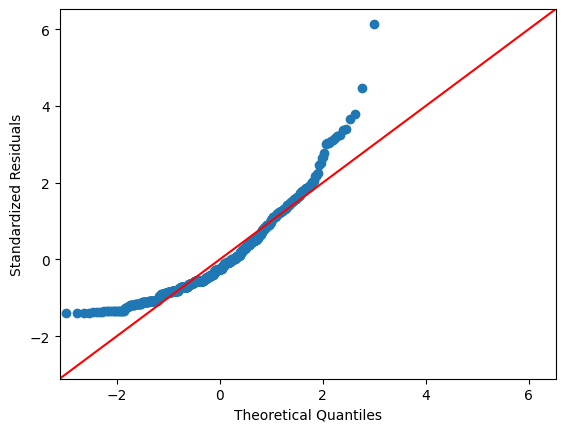

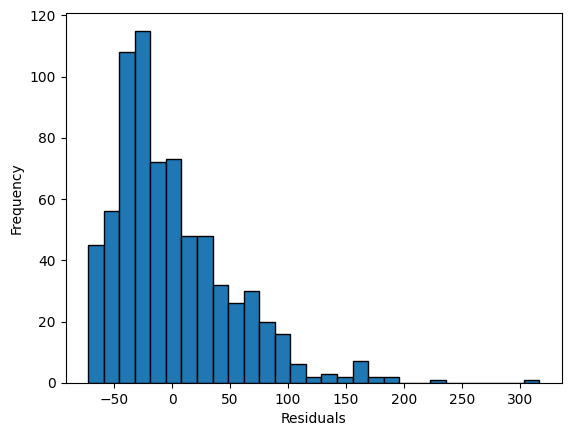

In [47]:
# QQ-plot of Residual
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram of Residual
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [48]:
# assumption 1: residuals are normally distributed: Shapiro Wilk test
model1 = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
w, pvalue = stats.shapiro(model1.resid)
print(w,pvalue)

0.901775598526001 1.4964898448030214e-25


In [49]:
# assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df, res_var='TOTSPACE', xfac_var='AUSPICE')
res.levene_summary

,Parameter,Value
0,Test statistics (W),9.1994
1,Degrees of freedom (Df),2.0000
2,p value,0.0001


# Two-Way ANOVA

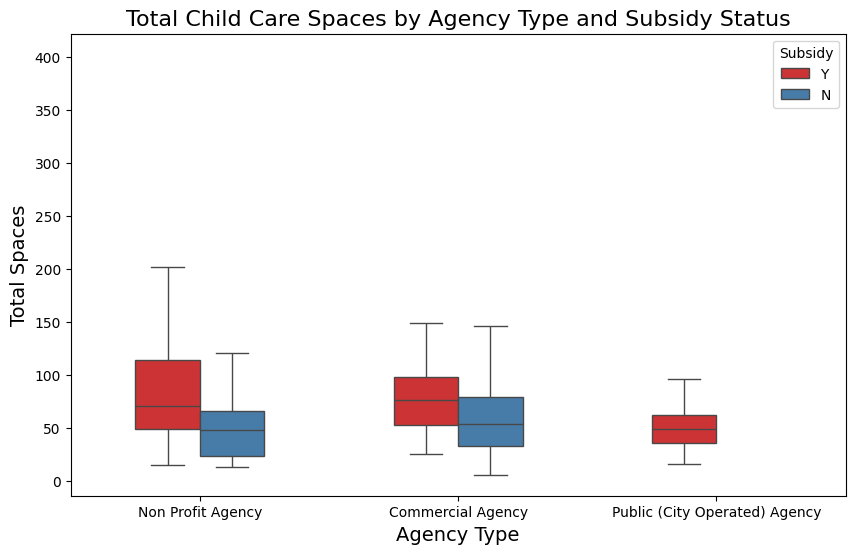

In [50]:
# Boxplot of total capacity by agency type and subsidy status
plt.figure(figsize=(10, 6))

sns.boxplot(x="AUSPICE", y="TOTSPACE", hue="subsidy", data=df, palette="Set1", width=0.5, fliersize=0)

plt.title('Total Child Care Spaces by Agency Type and Subsidy Status', fontsize=16)
plt.xlabel('Agency Type', fontsize=14)
plt.ylabel('Total Spaces', fontsize=14)
plt.legend(title='Subsidy')

plt.show()

In [51]:
# Two-way ANOVA test
res = stat()
res.anova_stat(df=df, res_var='TOTSPACE', anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,8.567996e+03,4283.998054,2.057586,1.282730e-01
C(subsidy),1.0,8.352744e+04,83527.441787,40.117876,3.529094e-10
C(AUSPICE):C(subsidy),2.0,5.603445e+04,28017.227037,13.456555,1.694282e-06
Residual,1058.0,2.202809e+06,2082.050461,NaN,NaN


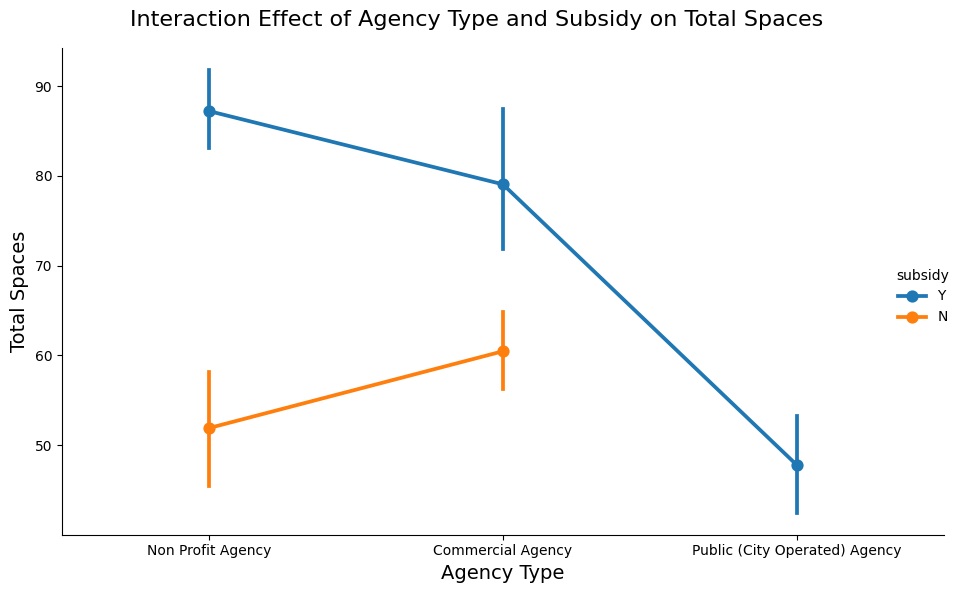

In [52]:
# Use seaborn's catplot to create an interaction plot, ***since interaction_plot function not working here***
g = sns.catplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', kind='point', data=df,
                height=6, aspect=1.5)  # Height of 6 inches and 1.5 times wider than tall

# Customize the plot with titles and labels
g.fig.suptitle('Interaction Effect of Agency Type and Subsidy on Total Spaces', fontsize=16)
plt.xlabel('Agency Type', fontsize=14)
plt.ylabel('Total Spaces', fontsize=14)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [53]:
# Post hoc test using Tukey's HSD for subsidy status
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var='subsidy',anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  war

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Y,N,34.121178,24.873006,43.36935,10.244062,0.001


In [54]:
# Post hoc test using Tukey's HSD for the interaction of agency type and subsidy status
res.tukey_hsd(df=df, res_var='TOTSPACE',xfac_var=['AUSPICE','subsidy'],anova_model='TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, Y)","(Non Profit Agency, N)",44.986164,25.584897,64.387430,9.370204,0.001000
1,"(Non Profit Agency, Y)","(Commercial Agency, Y)",0.145138,-28.465689,28.755965,0.020500,0.900000
2,"(Non Profit Agency, Y)","(Commercial Agency, N)",28.370552,11.192465,45.548638,6.674107,0.001000
3,"(Non Profit Agency, Y)","(Public (City Operated) Agency, Y)",40.752830,8.307960,73.197700,5.075887,0.004757
4,"(Non Profit Agency, Y)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
5,"(Non Profit Agency, N)","(Commercial Agency, Y)",44.841026,11.398078,78.283974,5.418401,0.001921
6,"(Non Profit Agency, N)","(Commercial Agency, N)",16.615612,-7.775739,41.006963,2.752838,0.375729
7,"(Non Profit Agency, N)","(Public (City Operated) Agency, Y)",4.233333,-32.543302,41.009969,0.465169,0.900000
8,"(Non Profit Agency, N)","(Public (City Operated) Agency, N)",0.000000,-inf,inf,0.000000,0.900000
9,"(Commercial Agency, Y)","(Commercial Agency, N)",28.225414,-3.978752,60.429580,3.541836,0.124403


In [55]:
# Fit the model for two-way ANOVA
model3 = ols('TOTSPACE ~ C(AUSPICE) + C(subsidy) + C(AUSPICE):C(subsidy)', data=df).fit()

# Shapiro-Wilk test for normality of residuals
w, pvalue_norm = stats.shapiro(model3.resid)
print(w, pvalue_norm)

0.9018619656562805 1.5311055543621852e-25


In [56]:
# Levene's test
df['interaction'] = df['AUSPICE'].astype(str) + "_" + df['subsidy'].astype(str)

# A list comprehension that aggregates values into groups based on the interaction term
groups = [df['TOTSPACE'][df['interaction'] == group].values for group in df['interaction'].unique()]

w, p_value = stats.levene(*groups)
print(w, p_value)

12.98471496619285 2.51515889994611e-10
